# Usiminas: Residência em Ciência de Dados

**Disciplina:** Probabilidade e Análise de Dados com Python

**Professores:** Flávio Figueiredo e Pedro Melo

**Aula 9:** Estudo de caso ENEM

# CADERNO DE EXERCÍCIOS - AULA 09

Utilizando as técnicas aprendidas até agora, analise os microdados do ENEM 2020 para responder às perguntas a seguir. Caso seja possível, gere visualizações apropriadas para cada uma delas.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
# Carregando o dataframe
# Encoding cp860 é o encoding para português. utf-8 não lê estes dados.
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

enem = pd.read_csv("MICRODADOS_ENEM_2020_FILTRADOS.csv")

In [3]:
enem.head()

,NU_INSCRICAO,SG_UF_ESC,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,TP_ANO_CONCLUIU,NU_NOTA_REDACAO,NU_NOTA_CN,TP_FAIXA_ETARIA,Q005,Q006,NU_NOTA_MT,NU_NOTA_CH,NU_NOTA_LC,TP_ESCOLA
0,200006271946,NaN,0,0,0,0,11,NaN,NaN,11,NaN,NaN,NaN,NaN,NaN,1
1,200001195856,NaN,1,1,1,1,11,580.0,604.1,11,NaN,NaN,711.3,661.7,595.3,1
2,200001943954,BA,0,0,0,0,0,NaN,NaN,4,3.0,B,NaN,NaN,NaN,2
3,200001908998,SP,1,1,1,1,0,760.0,620.8,2,NaN,NaN,759.4,675.0,624.2,2
4,200001634757,NaN,0,0,0,0,1,NaN,NaN,4,3.0,B,NaN,NaN,NaN,1


## 1. Quais os 5 estados brasileiros com maior taxa de ausência (geral) no ENEM 2020?


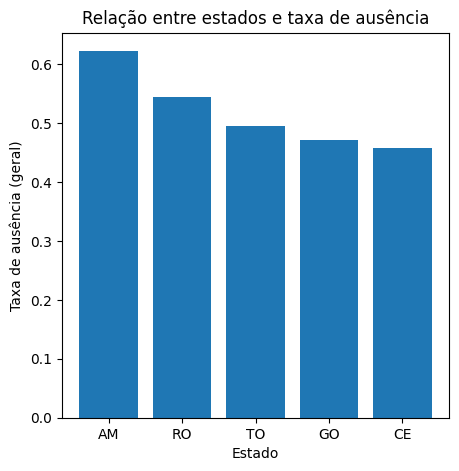

In [6]:
out = enem.query("TP_PRESENCA_CN == 0 and TP_PRESENCA_CH == 0 and TP_PRESENCA_LC == 0 and TP_PRESENCA_MT == 0")
present = enem.query("TP_PRESENCA_CN != 0 or TP_PRESENCA_CH != 0 or TP_PRESENCA_LC != 0 or TP_PRESENCA_MT != 0")

count_out = out.groupby("SG_UF_ESC")["SG_UF_ESC"].count()
count_presence = present.groupby("SG_UF_ESC")["SG_UF_ESC"].count()

absence_rate = count_out / (count_out + count_presence)
absence_rate = absence_rate.sort_values(ascending=False).iloc[:5]

plt.figure(figsize=(5, 5))
plt.bar(absence_rate.index, absence_rate.values)
plt.xlabel("Estado")
plt.ylabel("Taxa de ausência (geral)")
plt.title("Relação entre estados e taxa de ausência")
plt.show()

## 2. Como a probabilidade de um(a) candidato(a) obter nota superior a 600 na redação varia com o tempo desde que ele(a) concluiu o segundo grau? Esta tendência é a mesma observada em Ciências da natureza?

**Ovservação:** O valor da coluna TP_ANO_CONCLUIU já indica o tempo desde a conclusão até prova. Entretanto, o valor 0 não necessariamente indica que o estudante concluiu em 2020! Elimine este valor para análises mais precisas.

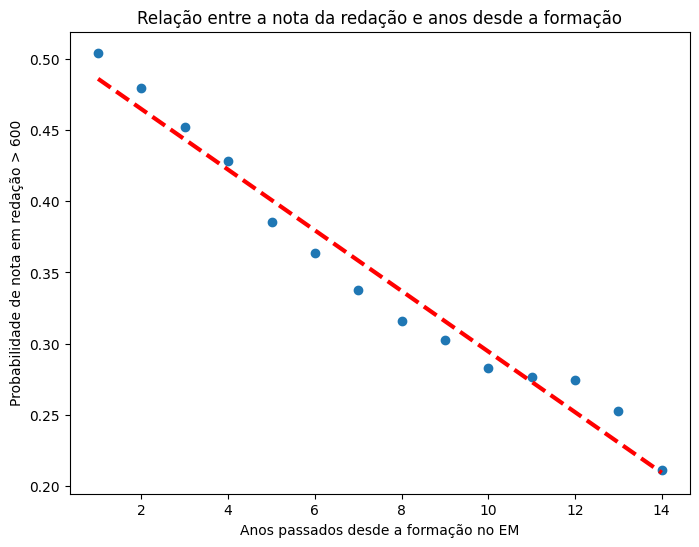

In [10]:
filtered = enem[enem["TP_ANO_CONCLUIU"] != 0]
filtered = filtered.dropna(subset=["NU_NOTA_REDACAO"])

more_than_600 = filtered.query("NU_NOTA_REDACAO > 600")
less_than_600 = filtered.query("NU_NOTA_REDACAO <= 600")

count_more = more_than_600.groupby("TP_ANO_CONCLUIU")["NU_NOTA_REDACAO"].count()
count_less = less_than_600.groupby("TP_ANO_CONCLUIU")["NU_NOTA_REDACAO"].count()

info = count_more / (count_more + count_less)

plt.figure(figsize=(8, 6))
plt.scatter(info.index, info.values)
plt.xlabel("Anos passados desde a formação no EM")
plt.ylabel("Probabilidade de nota em redação > 600")
plt.title("Relação entre a nota da redação e anos desde a formação")

z = np.polyfit(info.index, info.values, 1)
p = np.poly1d(z)
plt.plot(info.index, p(info.index), color="red", linewidth=3, linestyle="--")
plt.show()

**Nota-se que a probabilidade de tirar mais de 600 na redação diminui conforme aumenta o tempo que o estudante já teve sua formação.**

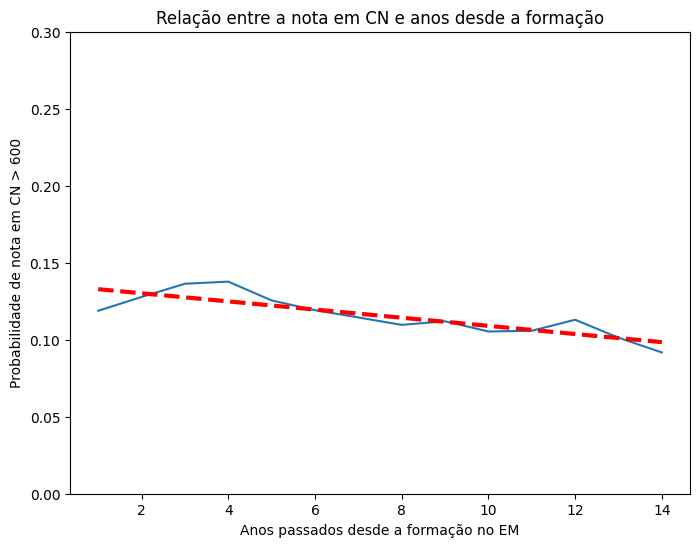

In [13]:
filtered = enem[enem["TP_ANO_CONCLUIU"] != 0]
filtered = filtered.dropna(subset=["NU_NOTA_CN"])

more_than_600 = filtered.query("NU_NOTA_CN > 600")
less_than_600 = filtered.query("NU_NOTA_CN <= 600")

count_more = more_than_600.groupby("TP_ANO_CONCLUIU")["NU_NOTA_CN"].count()
count_less = less_than_600.groupby("TP_ANO_CONCLUIU")["NU_NOTA_CN"].count()

info = count_more / (count_more + count_less)

plt.figure(figsize=(8, 6))
plt.ylim([0, 0.3])
plt.plot(info.index, info.values)
plt.xlabel("Anos passados desde a formação no EM")
plt.ylabel("Probabilidade de nota em CN > 600")
plt.title("Relação entre a nota em CN e anos desde a formação")

z = np.polyfit(info.index, info.values, 1)
p = np.poly1d(z)

plt.plot(info.index, p(info.index), color="red", linewidth=3, linestyle="--")
plt.show()

**A mesma intensidade de tendência não é vista em ciência da natureza, com uma decrescência bem baixa**

## 3. Como fatores como renda (Q006), número de pessoas que moram na mesma residência que o candidato (Q005), e a faixa etária (TP_FAIXA_ETARIA) do participante influenciam em sua nota em Matemática?

**Sugestões:** Para análises mais precisas, elimine as notas 0 e os candidatos que faltaram nas provas analisadas (ex:TP_PRESENCA_MT=0). Como as notas são uma escala contínua, você pode optar, se preferir, por torná-la discreta, criando classes que englobem faixas de notas (ex: 200<NU_NOTA_MT<400).

In [15]:
columns = ["Q006", "Q005", "TP_FAIXA_ETARIA", "NU_NOTA_MT"]

filtered = enem.query("TP_PRESENCA_MT != 0 and NU_NOTA_MT > 0")
filtered = filtered.dropna(subset=["Q006", "Q005", "TP_FAIXA_ETARIA"])
filtered = filtered[columns]

filtered["200-400"] = (filtered["NU_NOTA_MT"] > 200) & (filtered["NU_NOTA_MT"] <= 400)
filtered["400-600"] = (filtered["NU_NOTA_MT"] > 400) & (filtered["NU_NOTA_MT"] <= 600)
filtered["600-800"] = (filtered["NU_NOTA_MT"] > 600) & (filtered["NU_NOTA_MT"] <= 800)
filtered["800-1000"] = filtered["NU_NOTA_MT"] > 800

size = filtered.shape[0]
discret = ["200-400", "400-600", "600-800", "800-1000"]

##### Grupo de controle

In [16]:
filtered[discret].sum() / filtered[discret].count()

200-400     0.162725
400-600     0.581440
600-800     0.239003
800-1000    0.016832
dtype: float64

## Q005

Na discretização, percebe-se que o atributo tem uma concentração de notas menores que 600 no meio do "range", que diminui em notas acima de 600, aumentando em notas abaixo de 400.

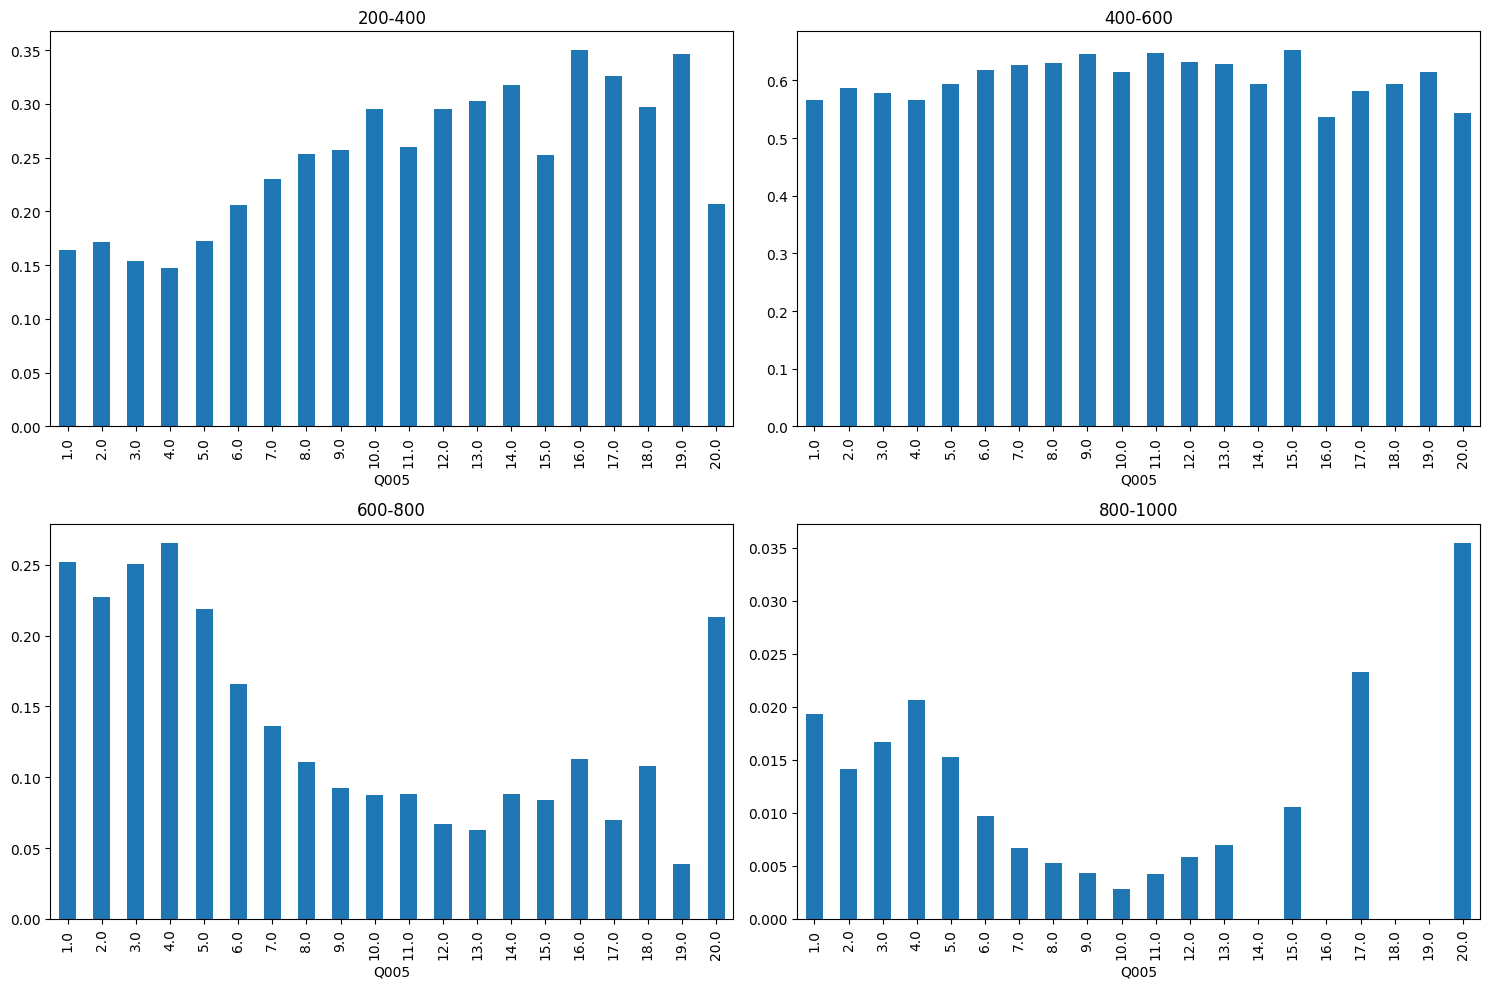

In [37]:
info = filtered.groupby("Q005")[discret].sum() / filtered.groupby("Q005")[discret].count()

figure, axis = plt.subplots(2, 2, figsize=(15, 10))

for i, col in enumerate(info.columns):
    ax = axis[int(i / 2)][i % 2]
    info[col].plot.bar(ax=ax)
    ax.set_title(col)

figure.tight_layout()
plt.show()

## Q006

Aqui já percebe uma tendência muito maior nos dados, em que conforme aumenta a renda, a nota se torna consideravelmente maior.

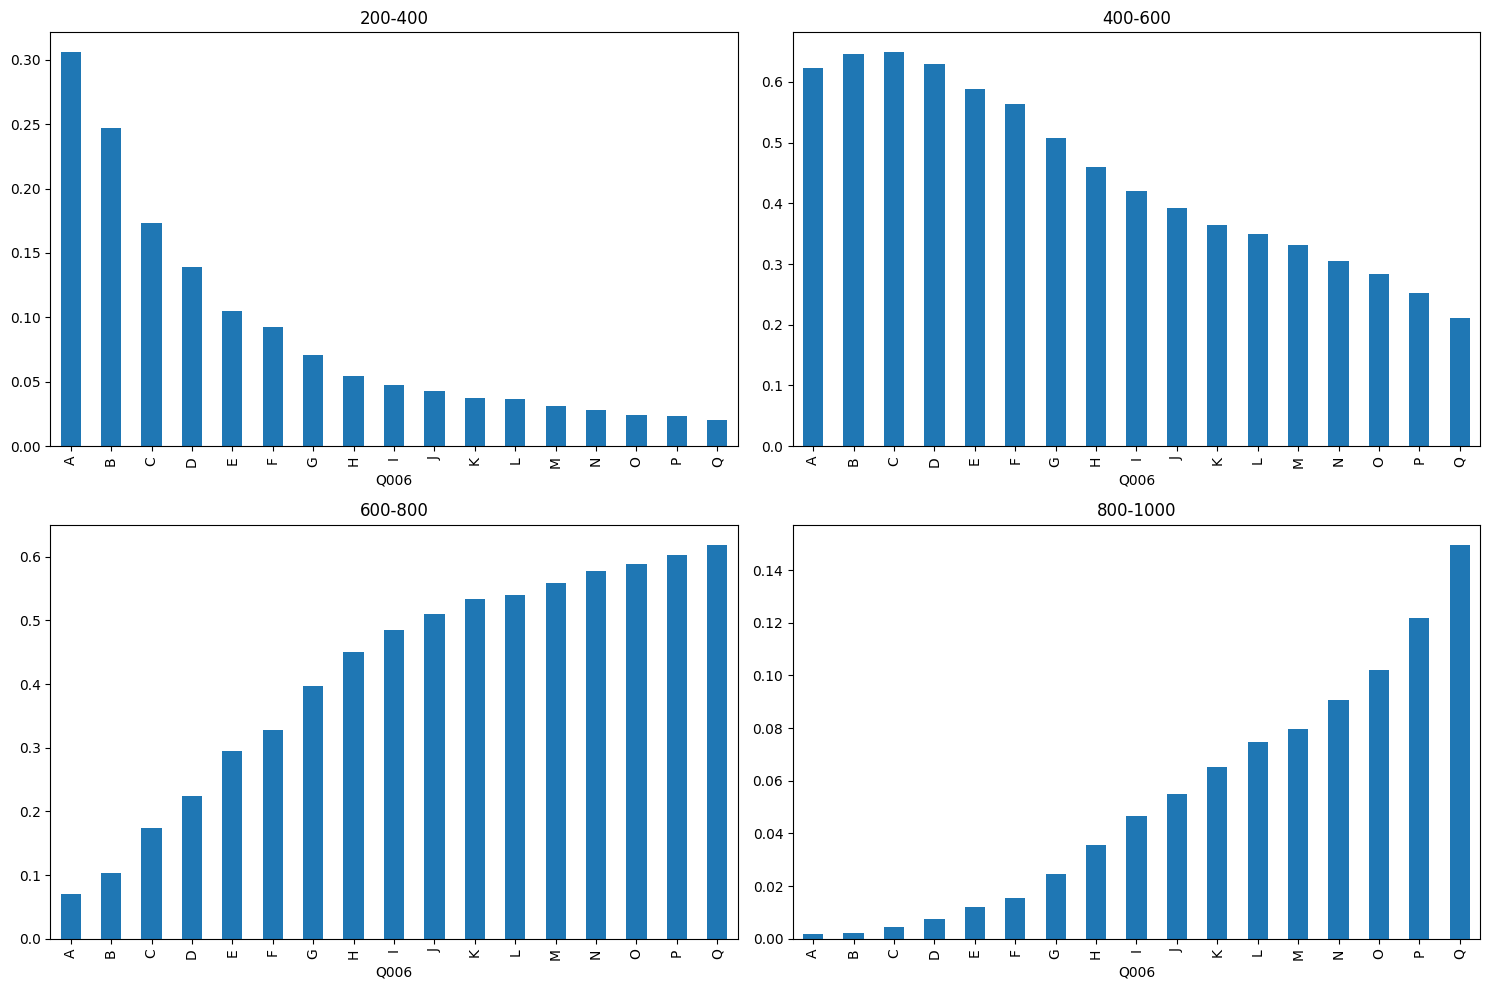

In [38]:
info = filtered.groupby("Q006")[discret].sum() / filtered.groupby("Q006")[discret].count()

figure, axis = plt.subplots(2, 2, figsize=(15, 10))

for i, col in enumerate(info.columns):
    ax = axis[int(i / 2)][i % 2]
    info[col].plot.bar(ax=ax)
    ax.set_title(col)

figure.tight_layout()
plt.show()

## TP_FAIXA_ETARIA

Na discretização, conforme aumenta a faixa etária, os grupos 600-800 e 800-1000 diminuem de taxa consideravelmente, e o grupo 200-400 aumenta bruscamente.

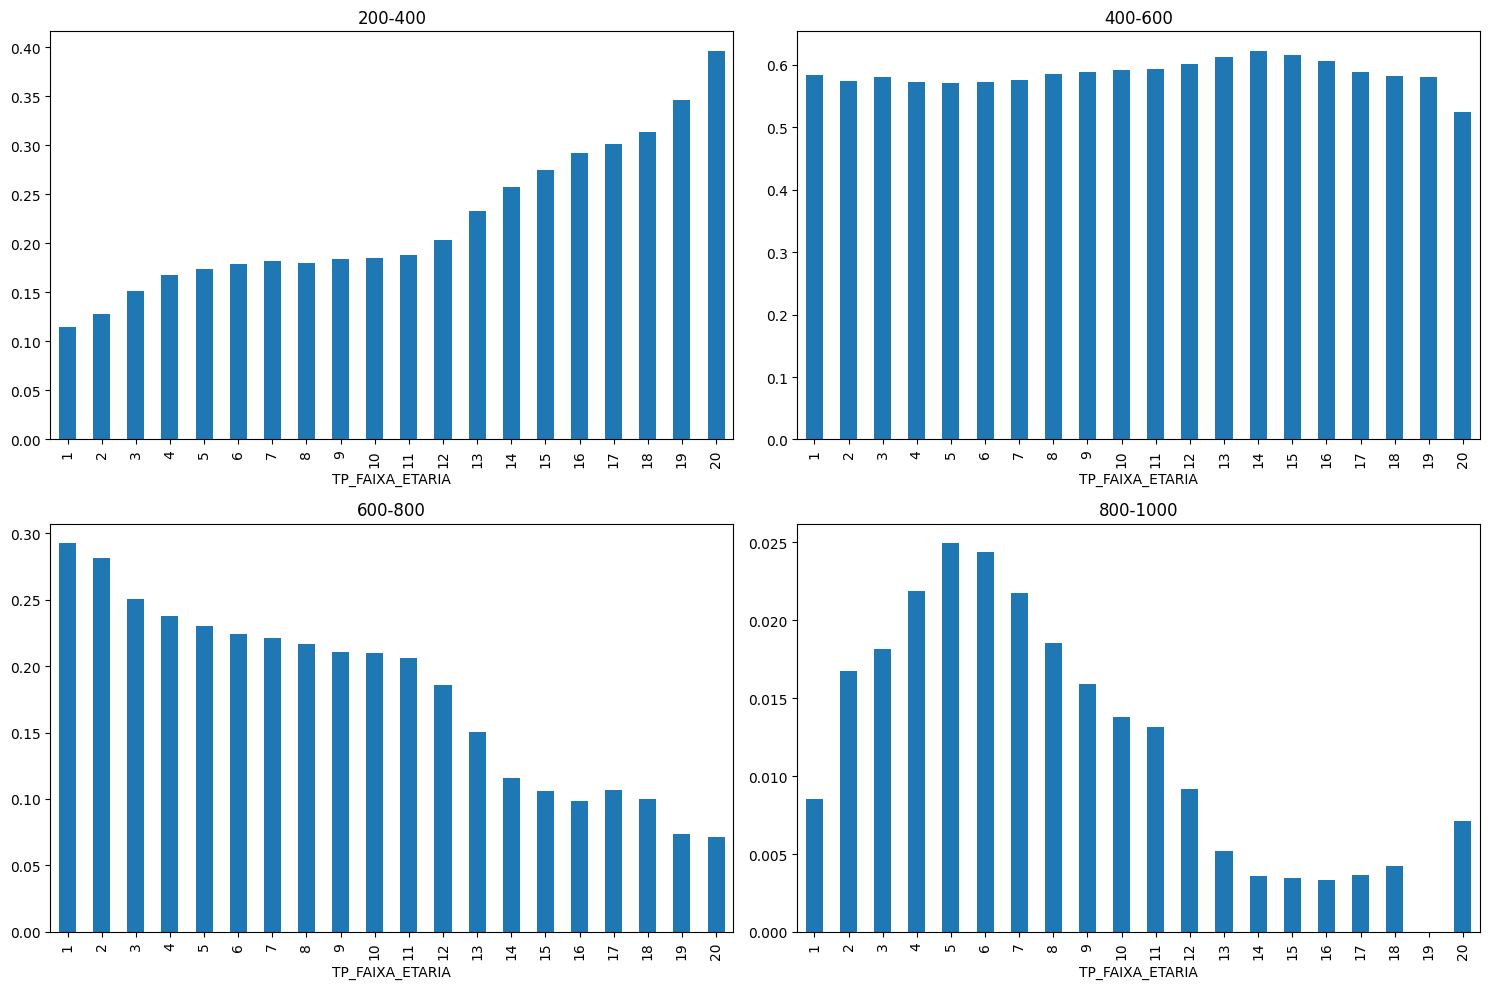

In [39]:
info = filtered.groupby("TP_FAIXA_ETARIA")[discret].sum() / filtered.groupby("TP_FAIXA_ETARIA")[discret].count()

figure, axis = plt.subplots(2, 2, figsize=(15, 10))

for i, col in enumerate(info.columns):
    ax = axis[int(i / 2)][i % 2]
    info[col].plot.bar(ax=ax)
    ax.set_title(col)

figure.tight_layout()
plt.show()